## Loading canonical positions and colors


In [1]:
import csv

%matplotlib inline  
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['legend.handlelength'] = 0
plt.rcParams["figure.figsize"] = (16,3)


def load_positions(csv_file):
    positions = {}
    file_name = csv_file.split('/')[-1]
    

    with open(csv_file, newline='') as csvfile:
        linereader = csv.reader(csvfile, delimiter=',')
        for row in linereader:
            index_id = 0
            index_x = 1
            index_y = 2
            index_z = 3
            cell_name = row[index_id]
            #print(cell_name)

            positions[cell_name] = {}
            positions[cell_name]['ap_position'] = float(row[index_x])
            positions[cell_name]['dv_position'] = float(row[index_y])
            positions[cell_name]['lr_position'] = float(row[index_z])

    print('Loaded in %i positions from %s'%(len(positions),csv_file))
    return positions

def load_colors(csv_file):
    colors = {}
    file_name = csv_file.split('/')[-1]
    

    with open(csv_file, newline='') as csvfile:
        linereader = csv.reader(csvfile, delimiter=',')
        for row in linereader:

            cell_name = row[0][1:-1]
            rgb = row[1][1:-1].split(',')
            colors[cell_name] = tuple([float(i) for i in rgb])

    print('Loaded in %i colors from %s'%(len(colors),csv_file))
    #print(colors)
    return colors

positions = load_positions('data/CanonicalPositions/LowResAtlasWithHighResHeadsAndTails.csv')
colors = load_colors('data/CanonicalPositions/NeuropalCanonicalColors.csv')

Loaded in 300 positions from data/CanonicalPositions/LowResAtlasWithHighResHeadsAndTails.csv
Loaded in 302 colors from data/CanonicalPositions/NeuropalCanonicalColors.csv


In [2]:

def generate_ap_dv_plot(positions, ref, type):

    plt.figure()
    plt.title('AP-DV - %s (%s.csv)'%(type, ref))
    plt.axis('equal')

    for neuron in sorted(positions.keys()):
    
        label='%s'%neuron
        plt.plot(positions[neuron]['ap_position'], 
                 positions[neuron]['dv_position'], 
                 marker="o",
                 linestyle=None,
                 color=colors[neuron],
                 label=label)
        
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=15)

def generate_ap_lr_plot(positions, ref, type):
        
    plt.figure()
    plt.title('AP-LR - %s (%s.csv)'%(type, ref))
    plt.axis('equal')

    for neuron in positions:

        label=None
        plt.plot(positions[neuron]['ap_position'], 
                 positions[neuron]['lr_position'], 
                 marker="o",
                 linestyle=None,
                 color=colors[neuron],
                 label=label)

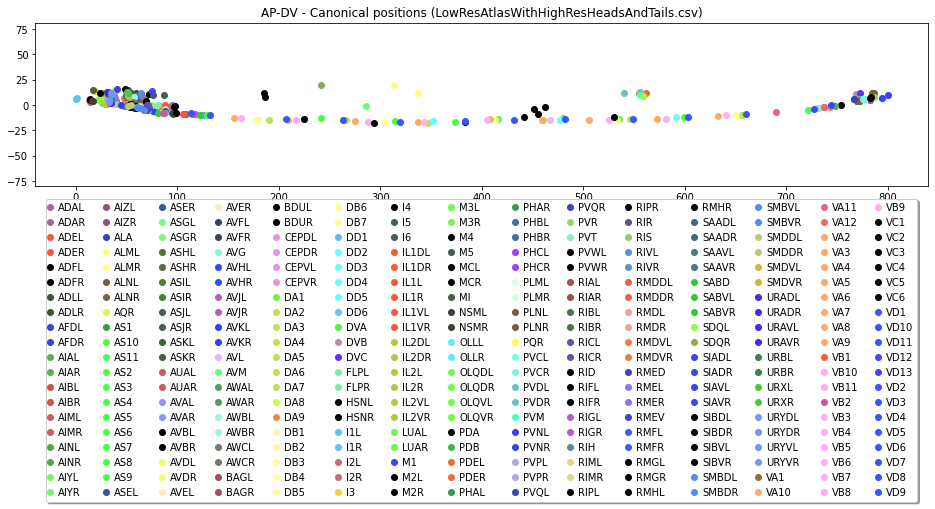

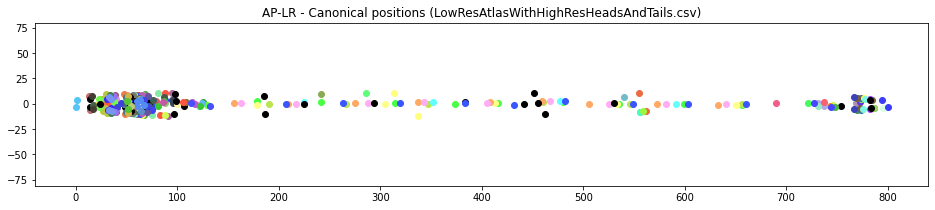

In [3]:
generate_ap_dv_plot(positions, 'LowResAtlasWithHighResHeadsAndTails', 'Canonical positions')
generate_ap_lr_plot(positions, 'LowResAtlasWithHighResHeadsAndTails', 'Canonical positions')

In [4]:

import neuroml
from pyneuroml import pynml

import neuroml.writers as writers


prototype_neuron = 'GenericNeuronCell'
cell = neuroml.FitzHughNagumoCell(id=prototype_neuron, I=0.1)

nml_doc = neuroml.NeuroMLDocument(id="NeuroPAL_Canonical")
nml_doc.fitz_hugh_nagumo_cells.append(cell)

net = neuroml.Network(id=nml_doc.id)
nml_doc.networks.append(net)

        
ref_ = 'Canonical'
nml_doc = neuroml.NeuroMLDocument(id="NeuroPAL_%s"%ref_)
nml_doc.fitz_hugh_nagumo_cells.append(cell)

net = neuroml.Network(id=nml_doc.id)
nml_doc.networks.append(net)
    
for neuron in positions:

    # Add in file for individual part
    pop = neuroml.Population(id="%s"%neuron, component=prototype_neuron, type="populationList")
    net.populations.append(pop)
    c = colors[neuron]
    pop.properties.append(neuroml.Property(tag="color", value='%f %f %f'%(c[0],c[1],c[2])))
    pop.properties.append(neuroml.Property(tag="radius", value=2))

    inst = neuroml.Instance(id="0")
    pop.instances.append(inst)

    inst.location = neuroml.Location(x=positions[neuron]['ap_position'], 
                             y=positions[neuron]['dv_position'], 
                             z=positions[neuron]['lr_position'])




###### Write the NeuroML network file ######   
nml_file = 'NeuroML2/%s.net.nml'%net.id
writers.NeuroMLWriter.write(nml_doc, nml_file)
print("Written network file to: "+nml_file)

###### Validate the NeuroML ######    
from neuroml.utils import validate_neuroml2
validate_neuroml2(nml_file)


###### Convert NeuroML network to svg ######    
#pynml.nml2_to_svg(nml_file) # uncomment this line to regenerate, commented out as quite verbose



Written network file to: NeuroML2/NeuroPAL_Canonical.net.nml
Validating NeuroML2/NeuroPAL_Canonical.net.nml against /Users/padraig/anaconda/envs/py37/lib/python3.7/site-packages/libNeuroML-0.4.0-py3.7.egg/neuroml/nml/NeuroML_v2.3.xsd
It's valid!


# Images generated from NeuroML

### All cells

![svg from neuroml](NeuroML2/NeuroPAL_Canonical.net.svg)